Assignment 3 (due on 11/22)

Student：张元新（12331318），Gtihub：CingyQ

批改人：赵淑慧

得分：58/60

# PS1. Niño 3.4 index
20/20  
1. Niño 3.4范围正确，计算月度气候态（多年平均每月）的SST，并获取SST距平。10/10
2. 根据厄尔尼诺和拉尼娜事件定义，模仿例图（x轴月尺度时间，y轴温度距平，黑线表示三个月滑动平均的距平值，红柱表示正距平，蓝柱表示负距平，有两种事件的阈值水平线）进行绘图。10/10

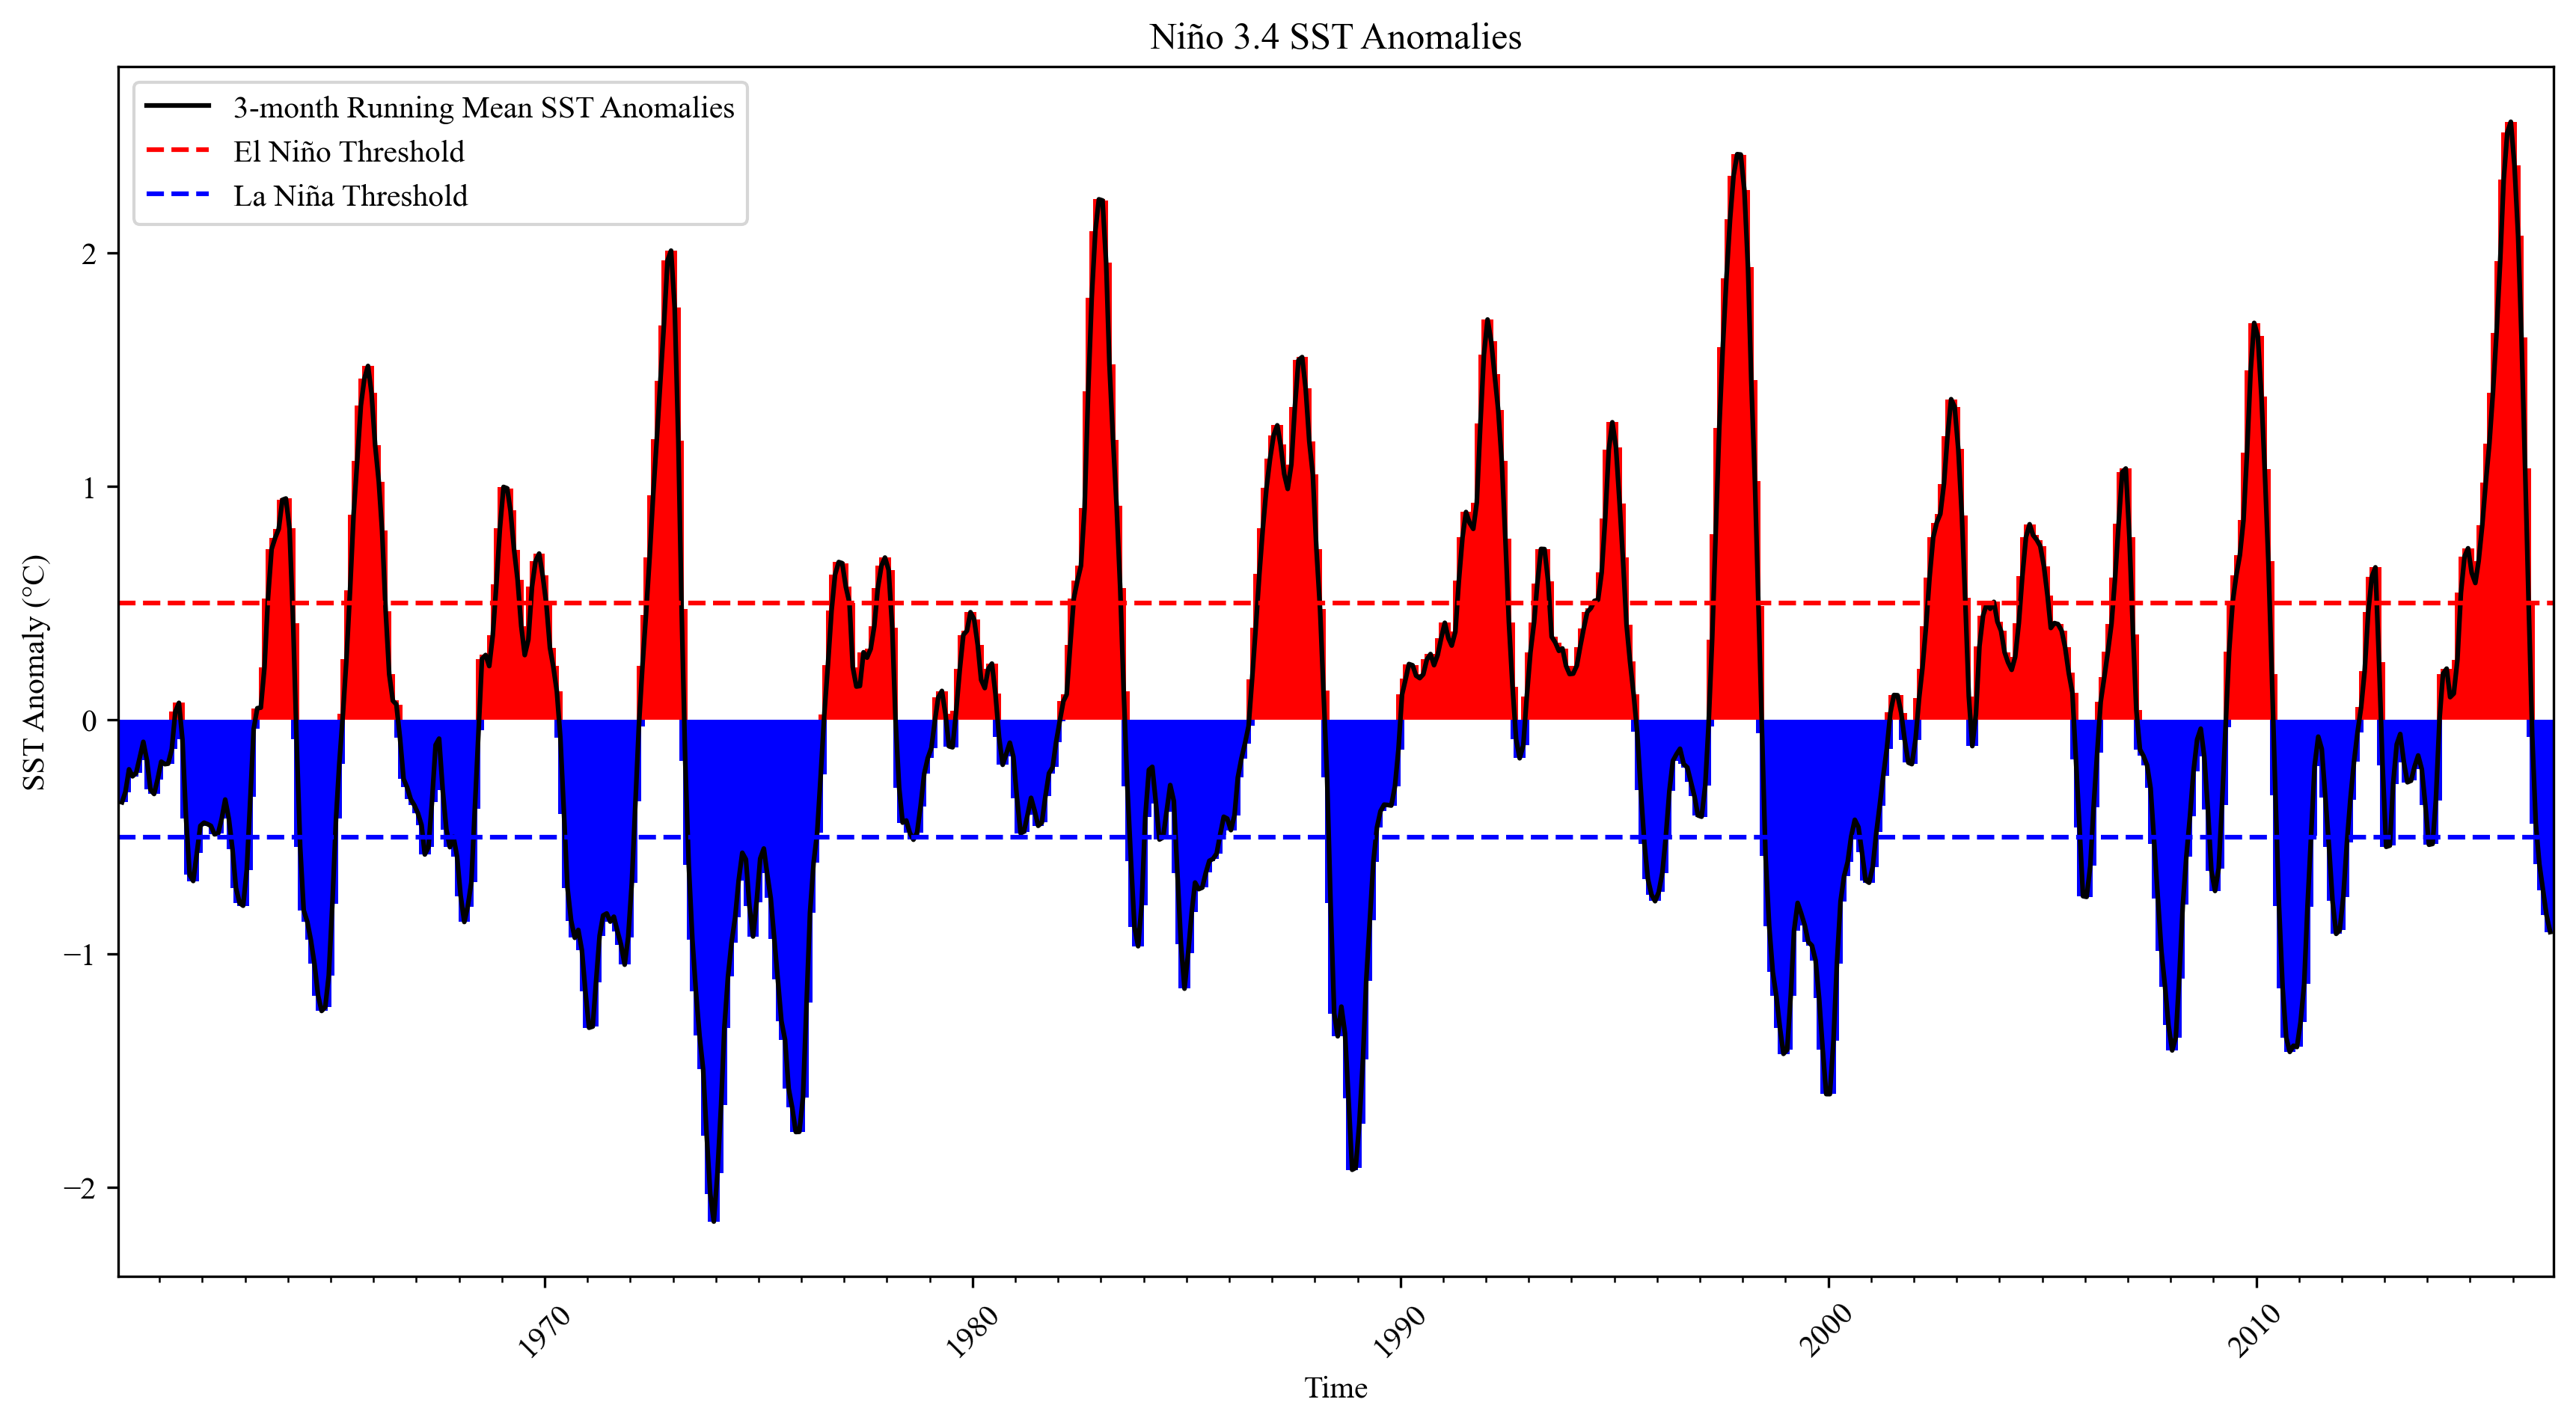

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 10

ds = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\NOAA_NCDC_ERSST_v3b_SST.nc")


nino34_sst = ds['sst'].sel(lat=slice(-5, 5), lon=slice(190, 240))


nino34_sst_mean = nino34_sst.mean(dim=['lat', 'lon'])


climatology = nino34_sst_mean.groupby('time.month').mean('time')


sst_anomalies = nino34_sst_mean.groupby('time.month') - climatology


sst_anomalies_rm = sst_anomalies.rolling(time=3, center=True).mean()
sst_anomalies_rm = sst_anomalies_rm.sel(time=sst_anomalies_rm['time'].dt.year >= 1960)
# print(sst_anomalies_rm)

time_data = sst_anomalies_rm['time'].to_index()


colors = ['red' if value > 0 else 'blue' for value in sst_anomalies_rm]


fig, ax = plt.subplots(figsize=(14, 7), dpi=300)
plt.plot(time_data, sst_anomalies_rm, label='3-month Running Mean SST Anomalies',color='black')
ax.bar(time_data, sst_anomalies_rm, width=100, color=colors, linewidth=1)


ax.xaxis.set_major_locator(mdates.YearLocator(10))  
ax.xaxis.set_minor_locator(mdates.YearLocator(1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
plt.xticks(rotation=45)  


plt.axhline(y=0.5, color='red', linestyle='--', label='El Niño Threshold')
plt.axhline(y=-0.5, color='blue', linestyle='--', label='La Niña Threshold')
plt.xlim(time_data[0], time_data[-1]) 

ax.set_xlabel('Time')
ax.set_ylabel('SST Anomaly (°C)')
ax.set_title('Niño 3.4 SST Anomalies')
plt.legend()

plt.savefig('Niño 3.4 SST Anomalies.png', dpi=300)
plt.show()


# PS2. Earth’s energy budget
28/30  
1. 绘制按时间平均的全天况下的TOA长波、短波、太阳辐射的2D图，将三者加和并可视化确认他们的和与TOA净通量相等。——报告中可以加上两种TOA净通量相等的文字性解释。5/5
2. 计算并确认TOA入射太阳辐射、出射长波、出射短波与示例图中的信息相符合，注意计算每个格网的实际面积。——地球表面积数值错误，高了4个数量级。10/10
3. 计算并绘制每1度纬度带上的净辐射总量，注意正确的单位。——由于2.2中格网面积计算错误导致结果有误。4/5
4. 计算并绘制低云区和高云区的按时间平均的出射短波和长波辐射的2D合成图。注意低云区和高云区的定义。5/5
5. 计算在高云区和低云区合成的短波和长波辐射的总体平均值，并回答云层对短波和长波辐射的总体影响是怎样的？——应按面积平均；解释中高云区和低云区的含义错误。4/5

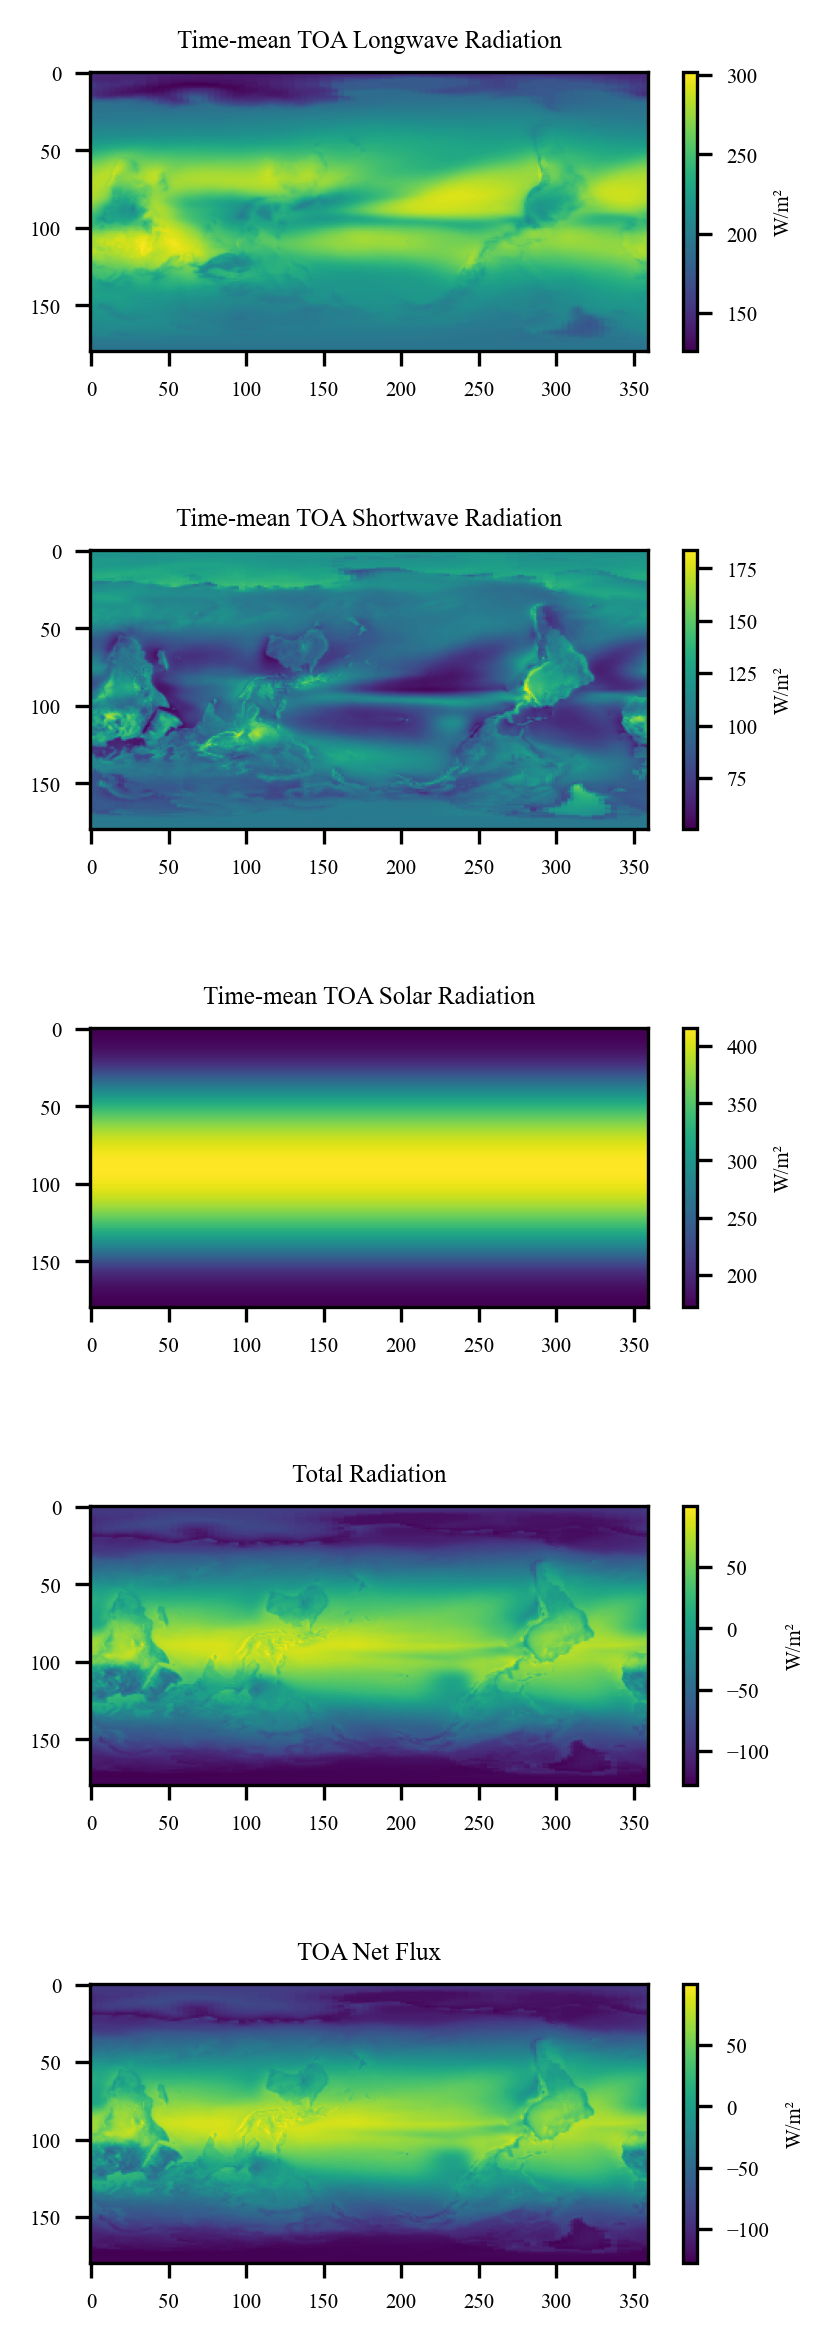

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
ds = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\CERES_EBAF-TOA_200003-201701.nc")
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 5
# Calculate the time-mean for each radiation
toa_lw_all_sky_mean = ds['toa_lw_all_mon'].mean(dim='time')
toa_sw_all_sky_mean = ds['toa_sw_all_mon'].mean(dim='time')
toa_solar_all_sky_mean = ds['solar_mon'].mean(dim='time')

# Plot the time-mean TOA longwave, shortwave, and solar radiation
plt.figure(figsize=(3,10), dpi=300)
ax1=plt.subplot(5,1,1)
plt.imshow(toa_lw_all_sky_mean)
plt.colorbar(ax=[ax1],label='W/m²',shrink=0.7)
plt.title('Time-mean TOA Longwave Radiation')

ax2=plt.subplot(5,1,2)
plt.imshow(toa_sw_all_sky_mean)
plt.colorbar(ax=[ax2],label='W/m²',shrink=0.7)
plt.title('Time-mean TOA Shortwave Radiation')

ax3=plt.subplot(5,1,3)
plt.imshow(toa_solar_all_sky_mean)
plt.colorbar(ax=[ax3],label='W/m²',shrink=0.7)

plt.title('Time-mean TOA Solar Radiation')


# Add up the three variables
total_radiation = toa_solar_all_sky_mean - toa_lw_all_sky_mean - toa_sw_all_sky_mean 
ax4=plt.subplot(5,1,4)
# Plot the total radiation
plt.imshow(total_radiation)
plt.colorbar(ax=[ax4],label='W/m²',shrink=0.7)
plt.title('Total Radiation')

ax5=plt.subplot(5,1,5)
# Plot the TOA net flux
plt.imshow(ds['toa_net_all_mon'].mean(dim='time'))
plt.colorbar(ax=[ax5],label='W/m²',shrink=0.7)
plt.title('TOA Net Flux')
# plt.legend()
plt.show()




In [5]:
import numpy as np

# Step 1: Calculate the area of each grid
area = ds['solar_mon'].sel(lat=slice(-90, 90), lon=slice(0, 360)).mean(dim='time') * 0 + 1
area = area * np.cos(np.deg2rad(ds['solar_mon']['lat']))
area = area * np.deg2rad(ds['solar_mon']['lon'] - ds['solar_mon']['lon'][0])
area = area * 6371.009 ** 2 * 1e6
earth_area = area.sum(dim=['lat', 'lon'])
print('Earth area:', earth_area.values, 'm^2')
# Step 2: Calculate the radiation for each grid
solar_radiation = ds['solar_mon'].sel(lat=slice(-90, 90), lon=slice(0, 360)).mean(dim='time') * area
lw_radiation = ds['toa_lw_all_mon'].sel(lat=slice(-90, 90), lon=slice(0, 360)).mean(dim='time') * area
sw_radiation = ds['toa_sw_all_mon'].sel(lat=slice(-90, 90), lon=slice(0, 360)).mean(dim='time') * area

# Step 3: Sum up the radiation for all grids
total_solar = solar_radiation.sum(dim=['lat', 'lon'])
total_lw = lw_radiation.sum(dim=['lat', 'lon'])
total_sw = sw_radiation.sum(dim=['lat', 'lon'])

# Print the results
print('Total incoming solar radiation:', float(total_solar.values/earth_area), 'W/m^2')
print('Total outgoing longwave radiation:', float(total_lw.values/earth_area), 'W/m^2')
print('Total outgoing shortwave radiation:', float(total_sw.values/earth_area), 'W/m^2')

Earth area: 5.2458865e+18 m^2
Total incoming solar radiation: 340.2850341796875 W/m^2
Total outgoing longwave radiation: 240.4961395263672 W/m^2
Total outgoing shortwave radiation: 98.21063232421875 W/m^2


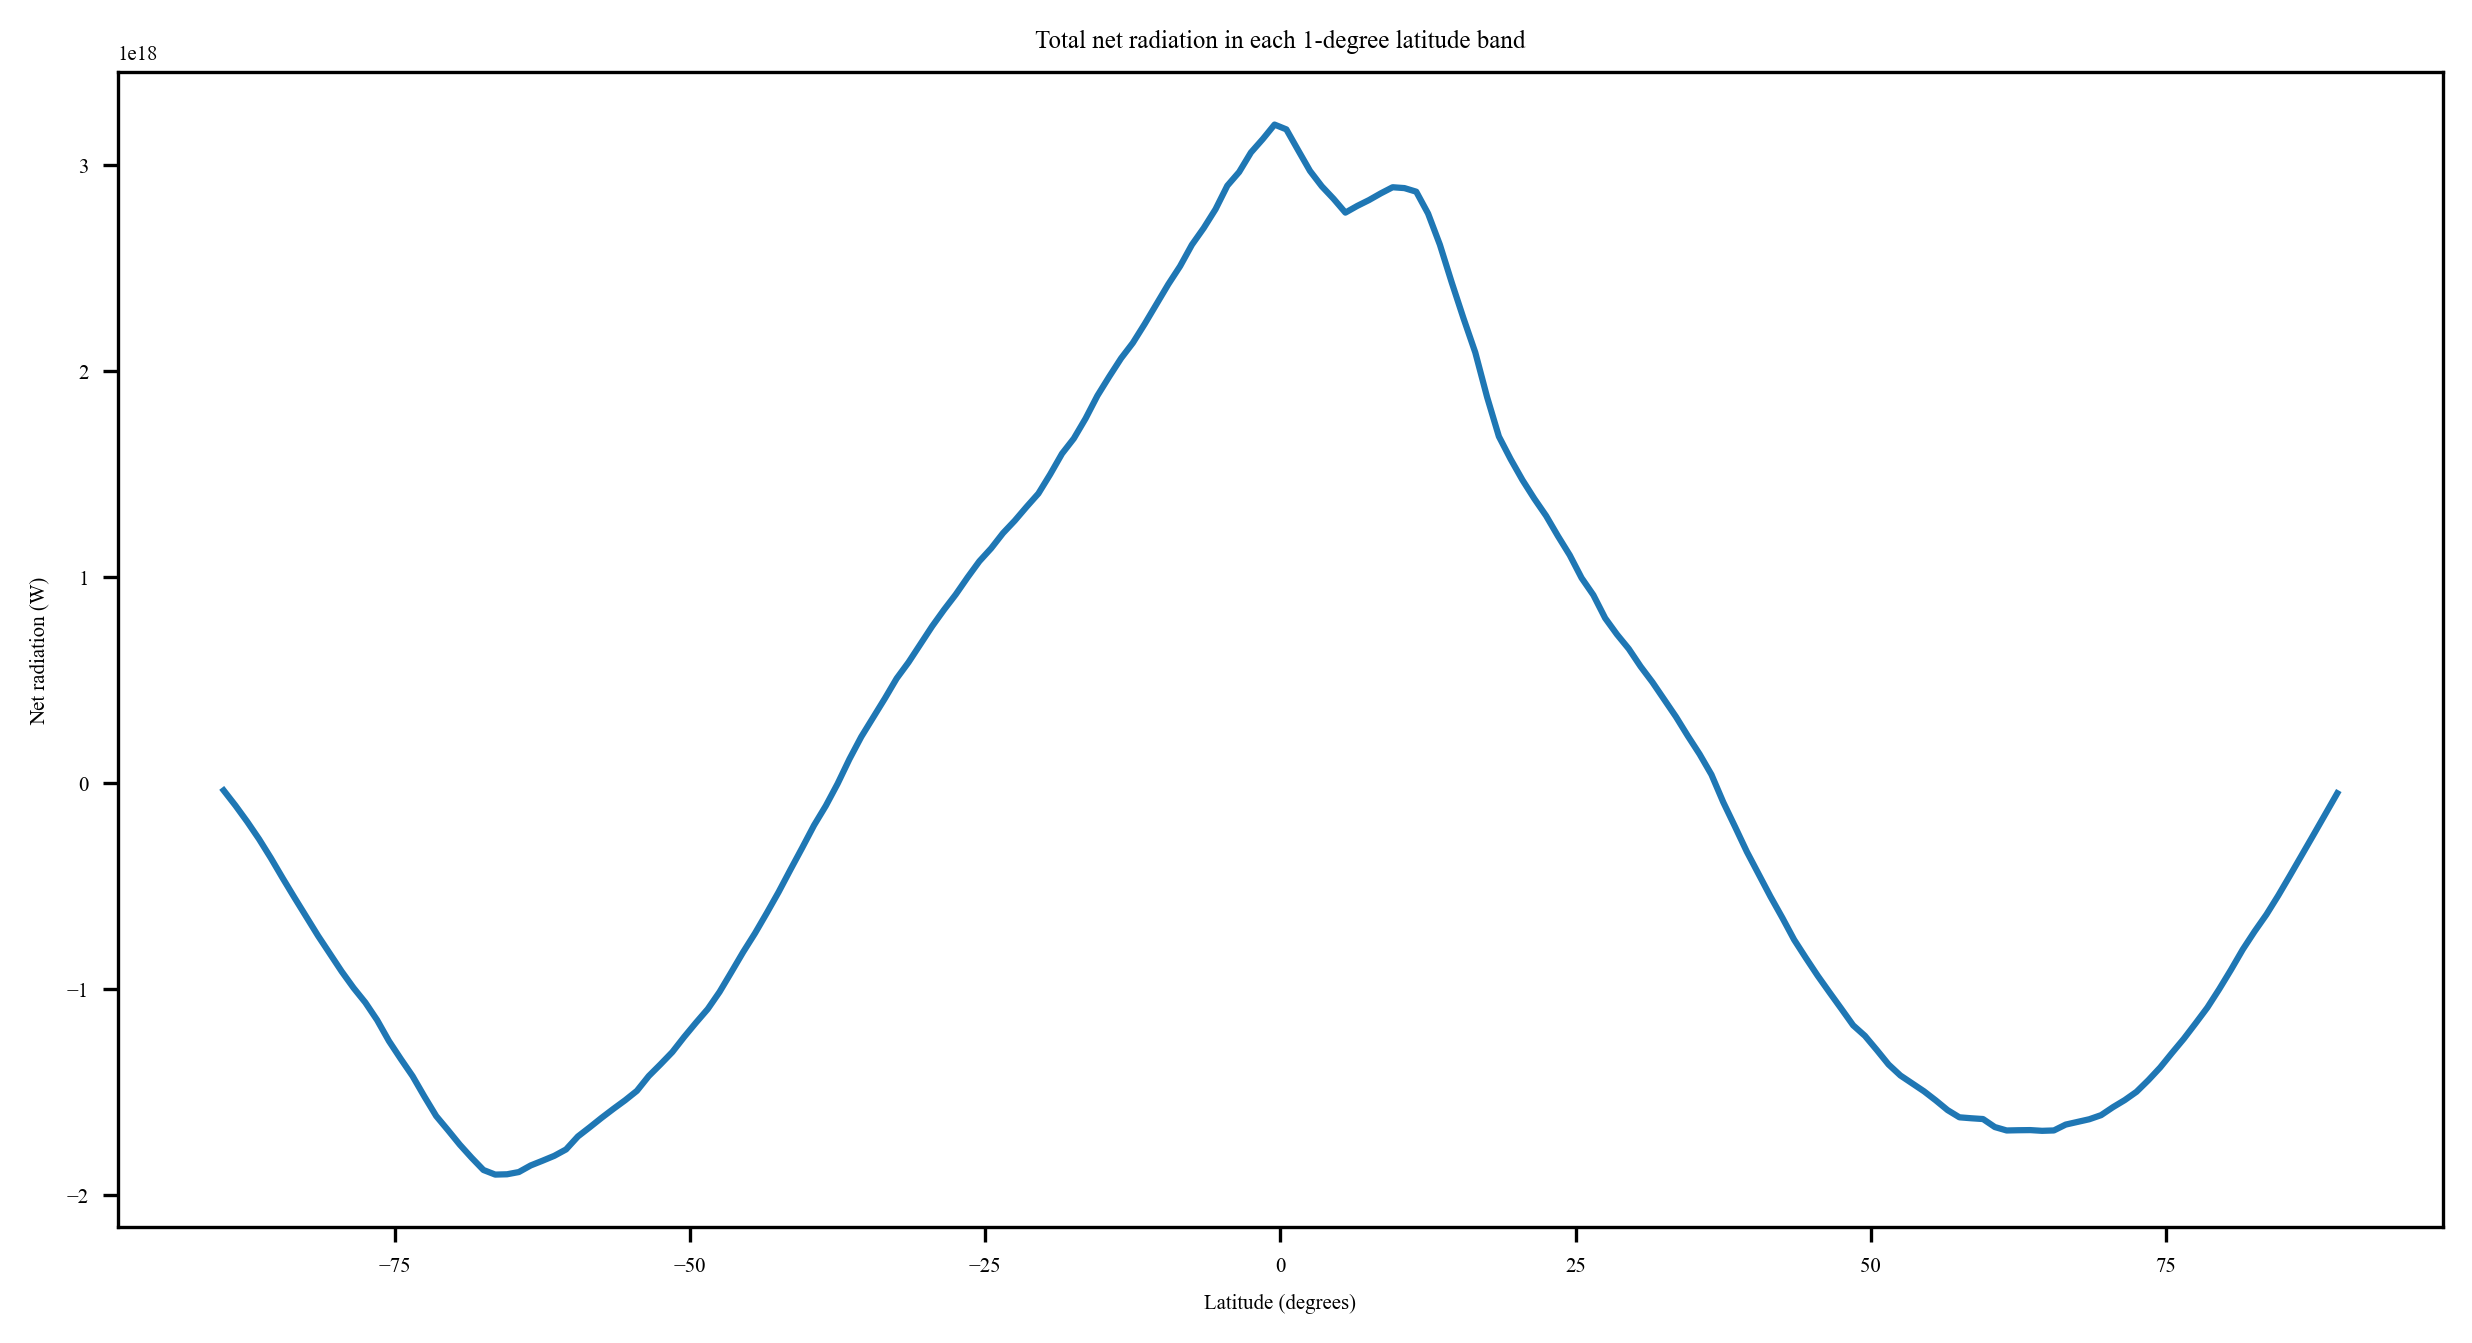

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 5
# Step 1: Calculate the net radiation for each grid cell
net_radiation = ds['toa_net_all_mon'].mean(dim='time') * area
net_radiation_total = net_radiation.sum(dim='lon')

# Step 3: Plot the total net radiation for each latitude band
fig, ax = plt.subplots(figsize=(10, 5),dpi=300)
net_radiation_total.plot(ax=ax)
ax.set_xlabel('Latitude (degrees)')
ax.set_ylabel('Net radiation (W)')
ax.set_title('Total net radiation in each 1-degree latitude band')
plt.show()


In [7]:
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 43.85 43.85 ... 0.049
    toa_lw_all_mon               (time, lat, lon) float32 139.6 139.6 ... 168.5
    toa_net_all_mon              (time, lat, lon) float32 -126.4 ... -168.6
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 57.13 57.13 ... 0.0
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

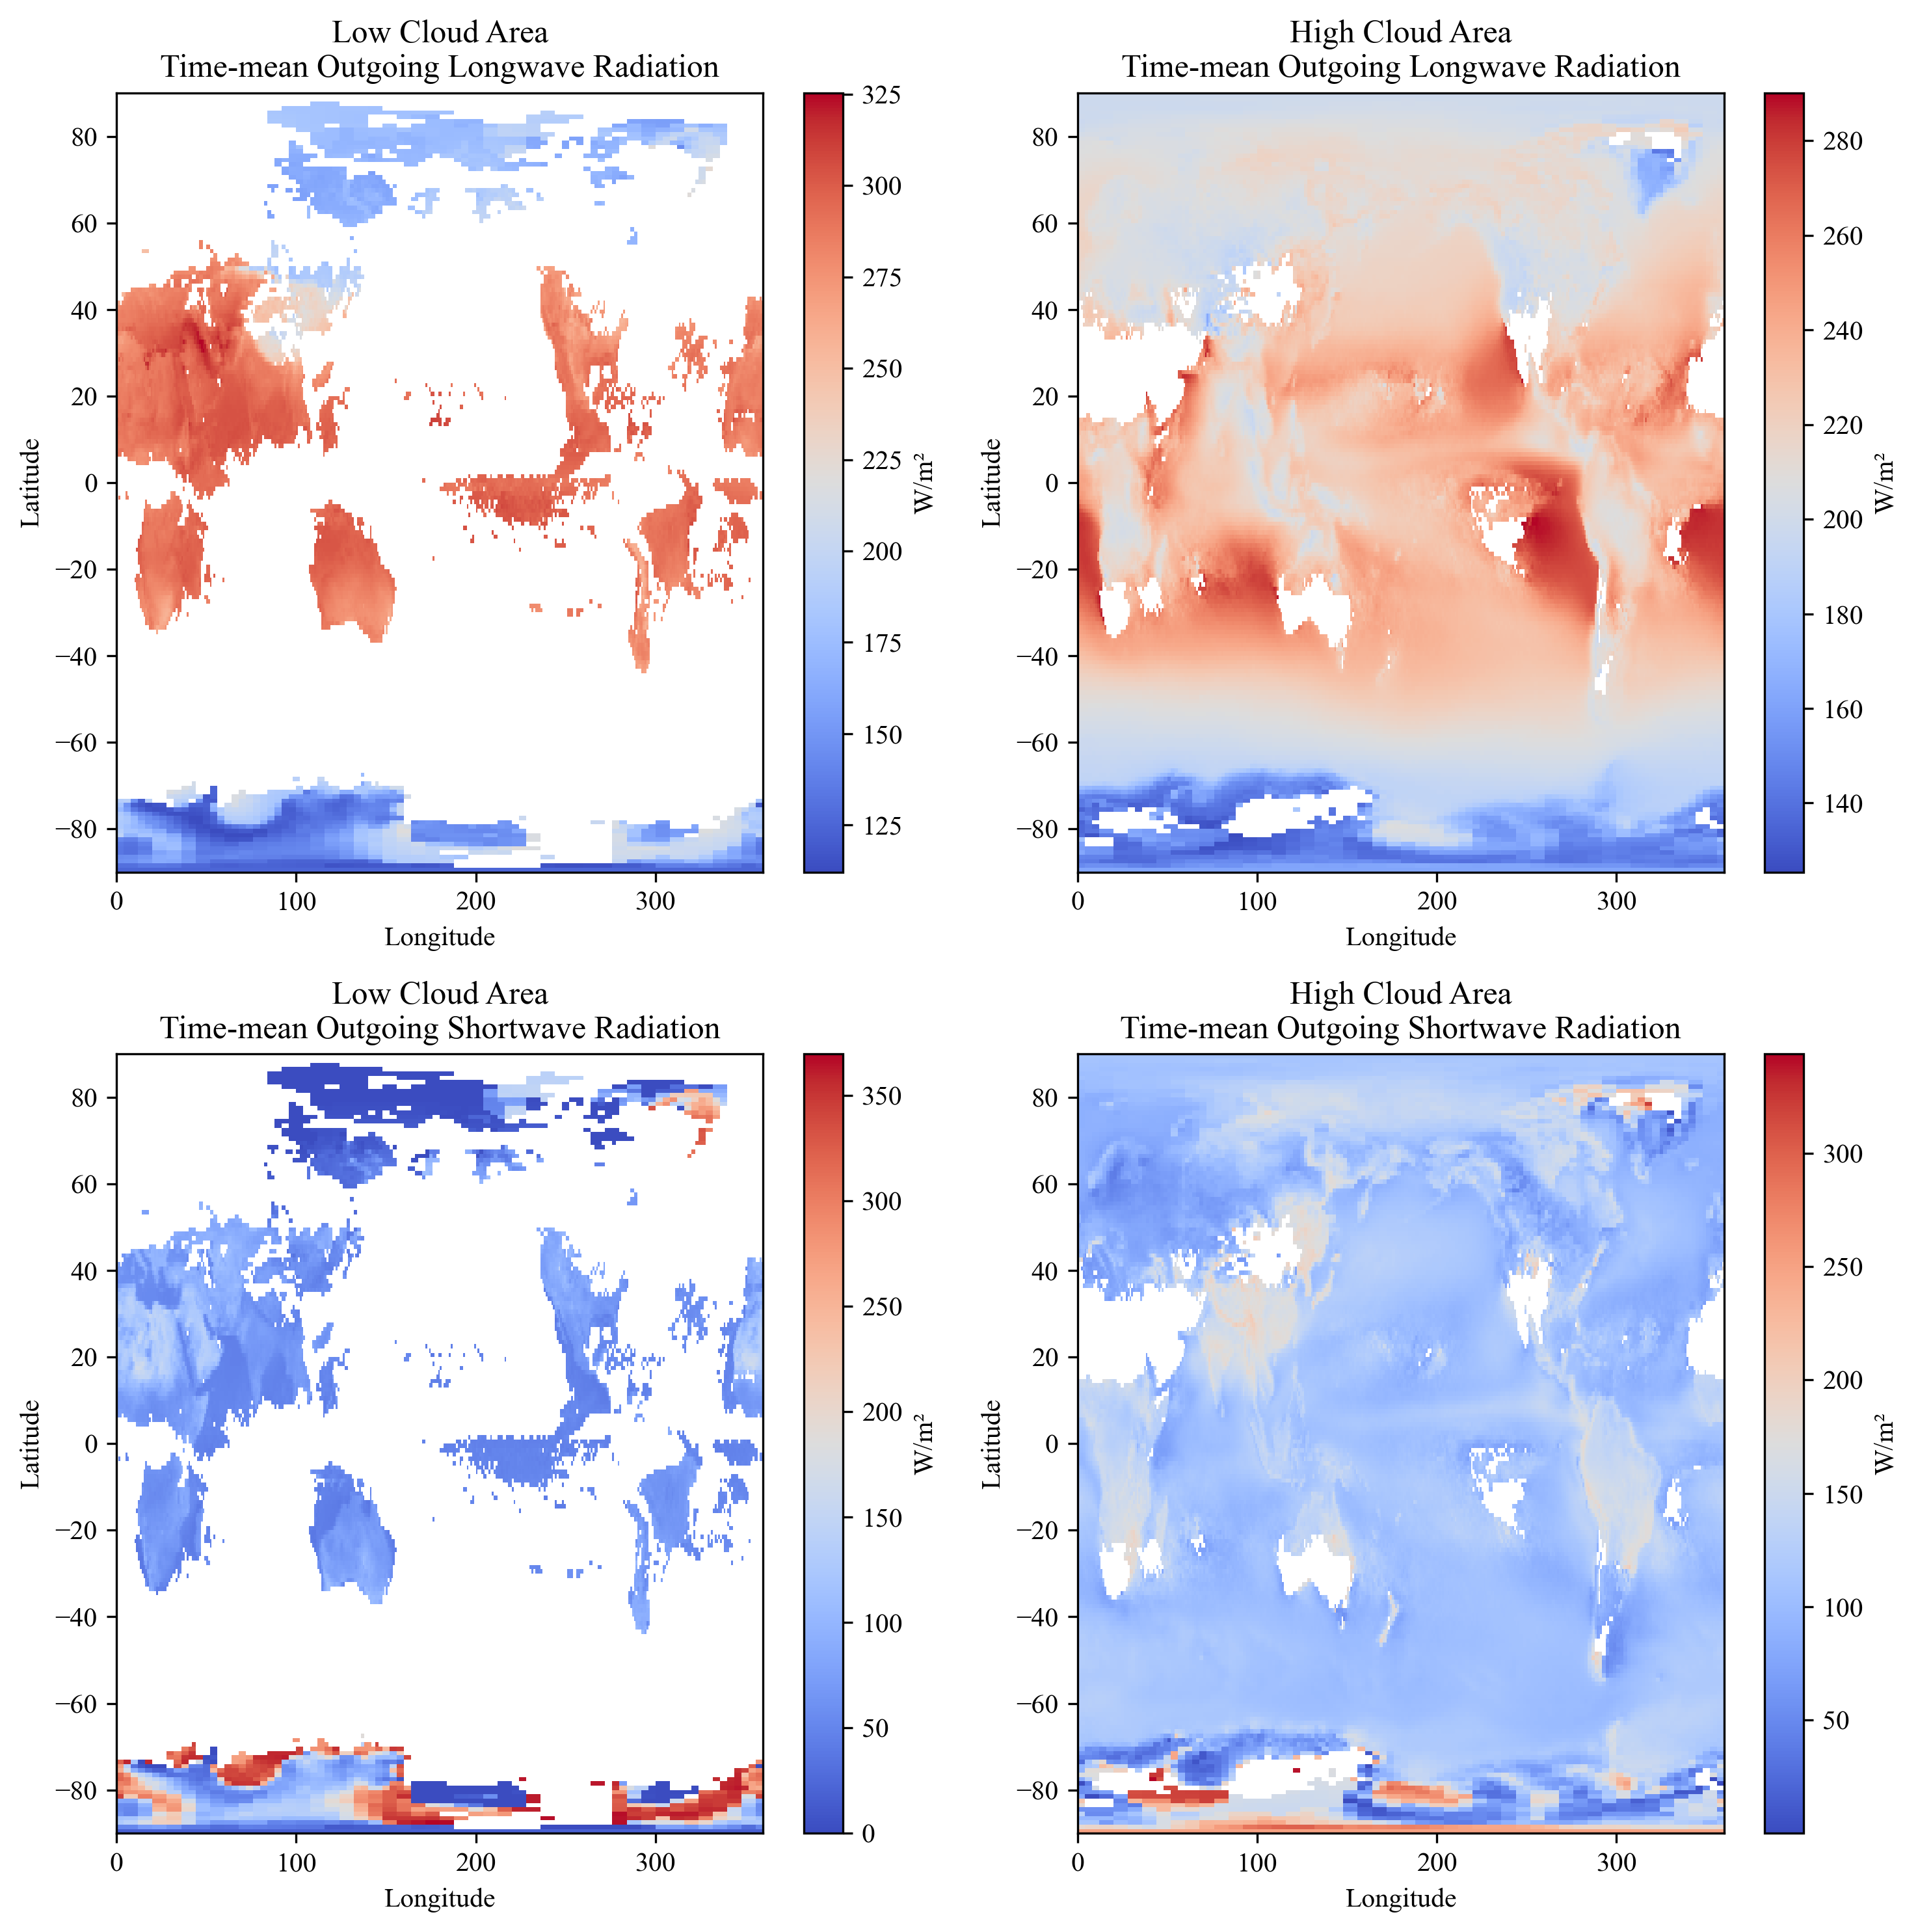

In [9]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 10
# Load the dataset
ds = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\CERES_EBAF-TOA_200003-201701.nc")

# Calculate the cloud fraction for each grid cell
cf = ds['cldarea_total_daynight_mon'] / 100

# Group the grid cells into low and high cloud area regions based on the cloud fraction
low_cf = cf <= 0.25
high_cf = cf >= 0.75

# Calculate the time-mean outgoing shortwave and longwave radiation for each region
lw_out_low = ds['toa_lw_all_mon'].where(low_cf).mean(dim='time')
lw_out_high = ds['toa_lw_all_mon'].where(high_cf).mean(dim='time')
sw_out_low = ds['toa_sw_all_mon'].where(low_cf).mean(dim='time')
sw_out_high = ds['toa_sw_all_mon'].where(high_cf).mean(dim='time')

# Plot the results as 2D maps
fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=300)

lw_out_low.plot(ax=axs[0, 0], cmap='coolwarm', cbar_kwargs={'label': 'W/m²'})
axs[0, 0].set_title('Low Cloud Area\nTime-mean Outgoing Longwave Radiation')
axs[0, 0].set_xlabel('Longitude')
axs[0, 0].set_ylabel('Latitude')

lw_out_high.plot(ax=axs[0, 1], cmap='coolwarm', cbar_kwargs={'label': 'W/m²'})
axs[0, 1].set_title('High Cloud Area\nTime-mean Outgoing Longwave Radiation')
axs[0, 1].set_xlabel('Longitude')
axs[0, 1].set_ylabel('Latitude')

sw_out_low.plot(ax=axs[1, 0], cmap='coolwarm', cbar_kwargs={'label': 'W/m²'})
axs[1, 0].set_title('Low Cloud Area\nTime-mean Outgoing Shortwave Radiation')
axs[1, 0].set_xlabel('Longitude')
axs[1, 0].set_ylabel('Latitude')

sw_out_high.plot(ax=axs[1, 1], cmap='coolwarm', cbar_kwargs={'label': 'W/m²'})
axs[1, 1].set_title('High Cloud Area\nTime-mean Outgoing Shortwave Radiation')
axs[1, 1].set_xlabel('Longitude')
axs[1, 1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()


In [10]:

lw_out_low_mean = ds['toa_lw_all_mon'].where(low_cf).mean()
lw_out_high_mean = ds['toa_lw_all_mon'].where(high_cf).mean()
sw_out_low_mean = ds['toa_sw_all_mon'].where(low_cf).mean()
sw_out_high_mean = ds['toa_sw_all_mon'].where(high_cf).mean()


print('Global mean outgoing longwave radiation in low cloud area:', lw_out_low_mean.values, 'W/m^2')
print('Global mean outgoing longwave radiation in high cloud area:', lw_out_high_mean.values, 'W/m^2')
print('Global mean outgoing shortwave radiation in low cloud area:', sw_out_low_mean.values, 'W/m^2')
print('Global mean outgoing shortwave radiation in high cloud area:', sw_out_high_mean.values, 'W/m^2')



Global mean outgoing longwave radiation in low cloud area: 247.33109 W/m^2
Global mean outgoing longwave radiation in high cloud area: 215.39049 W/m^2
Global mean outgoing shortwave radiation in low cloud area: 97.11116 W/m^2
Global mean outgoing shortwave radiation in high cloud area: 111.76594 W/m^2


# PS3. Explore a netCDF dataset
10/10  
1. 绘制某个变量的时间序列，注意去掉月尺度的季节性周期。5/5
2. 用该数据集绘制至少5种不同的图。5/5

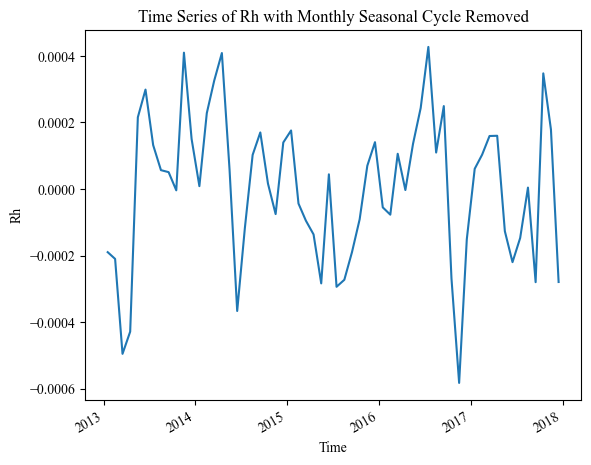

In [10]:
import matplotlib.pyplot as plt
import xarray as xr
import os
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 10

file_paths = ['data/GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2013.nc',
              'data/GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2014.nc',
              'data/GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2015.nc',
              'data/GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2016.nc',
              'data/GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2017.nc']


datasets = []


for file_path in file_paths:
    if os.path.exists(file_path):
        datasets.append(xr.open_dataset(file_path))
    else:
        print(f"File {file_path} does not exist.")


ds_combined = xr.concat(datasets, dim='time')


Rh_deseasonalized = ds_combined.Rh.sel(latitude=slice(-90, 90), longitude=slice(0, 360))


Rh_deseasonalized = Rh_deseasonalized.groupby('time.month') - Rh_deseasonalized.groupby('time.month').mean()


Rh_deseasonalized.mean(dim=["latitude","longitude"]).plot()
plt.title('Time Series of Rh with Monthly Seasonal Cycle Removed')
plt.ylabel('Rh')
plt.xlabel('Time')
plt.show()

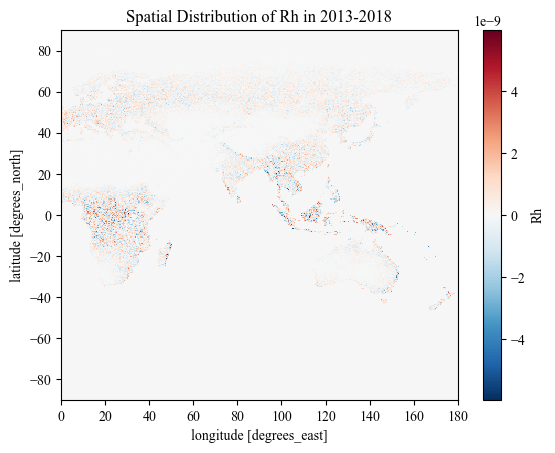

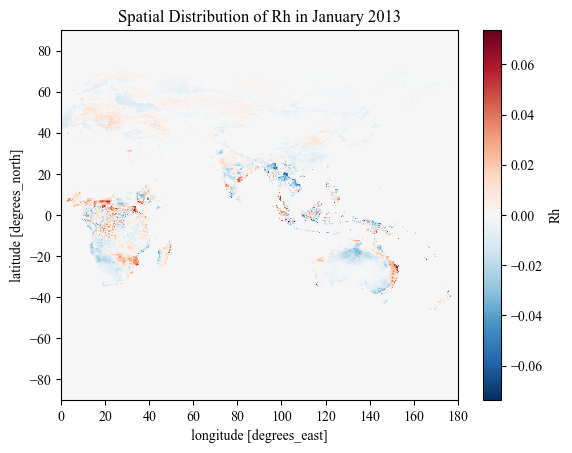

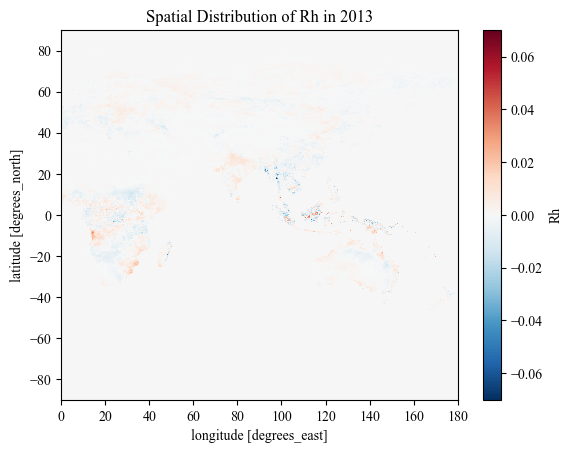

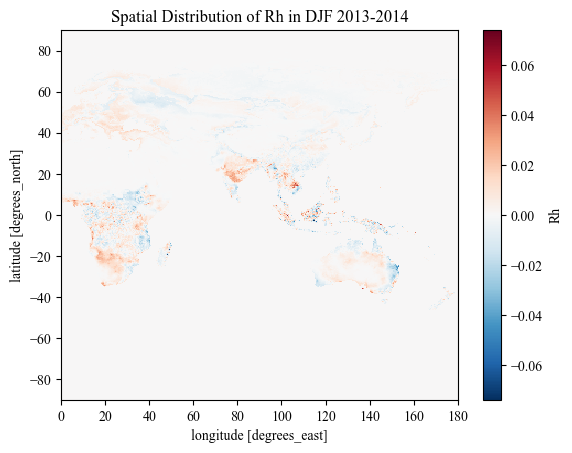

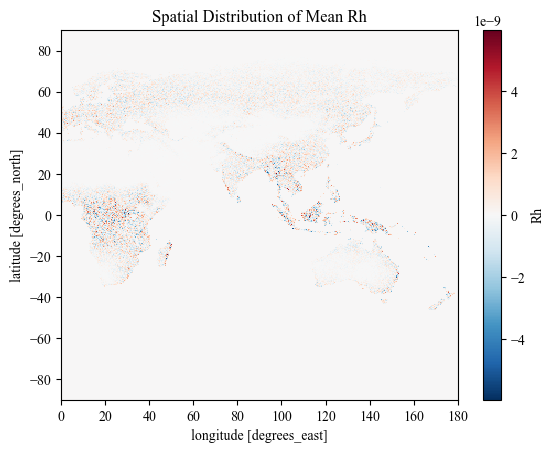

In [14]:
import xarray as xr
import os
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 10

file_paths = ['data/GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2013.nc',
              'data/GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2014.nc',
              'data/GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2015.nc',
              'data/GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2016.nc',
              'data/GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2017.nc']


datasets = []


for file_path in file_paths:
    if os.path.exists(file_path):
        datasets.append(xr.open_dataset(file_path))
    else:
        print(f"File {file_path} does not exist.")


ds_combined = xr.concat(datasets, dim='time')


Rh_deseasonalized = ds_combined.Rh.sel(latitude=slice(-90, 90), longitude=slice(0, 360))


Rh_deseasonalized = Rh_deseasonalized.groupby('time.month') - Rh_deseasonalized.groupby('time.month').mean()


Rh_deseasonalized.sel(time=slice('2013', '2018')).mean(dim='time').plot()
plt.title('Spatial Distribution of Rh in 2013-2018')
plt.show()

Rh_deseasonalized.sel(time='2013-01').plot()
plt.title('Spatial Distribution of Rh in January 2013')
plt.show()


Rh_deseasonalized.sel(time=slice('2013', '2013')).mean(dim='time').plot()
plt.title('Spatial Distribution of Rh in 2013')
plt.show()


Rh_deseasonalized.sel(time=slice('2013-12', '2014-02')).mean(dim='time').plot()
plt.title('Spatial Distribution of Rh in DJF 2013-2014')
plt.show()


Rh_deseasonalized.mean(dim='time').plot()
plt.title('Spatial Distribution of Mean Rh')
plt.show()
